In [2]:
from csv import DictReader
import numpy as np
import chardet
import matplotlib
from scipy import stats
import collections

import matplotlib.pyplot as plt

In [4]:
# Vnos podatkov
reader = DictReader(open('data/pn2019.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'],row['VozniskiStazVLetih']] for row in reader])

# popravila vrednost alkotesta.
for i in range(len(podatki)):
    podatki[i][1] = float(podatki[i][1].replace(',','.'))

<BarContainer object of 4 artists>

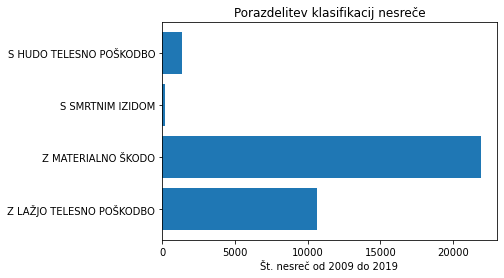

In [6]:
# Vizualizacija resnosti (izida) nesreče. 
vrste = dict()
for poskodba in podatki[:, 0]:
    if(poskodba not in vrste):
        vrste[poskodba] = 1
    else:
        vrste[poskodba] += 1

xVal = list(vrste.values())
yVal = list(vrste.keys())

plt.title("Porazdelitev klasifikacij nesreče")
plt.xlabel("Št. nesreč od 2009 do 2019")
plt.barh(yVal,xVal)

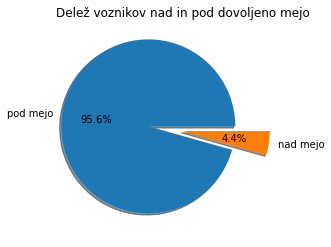

In [128]:
# Delez voznikov pod, nad dovoljeno mejo
alkotest = np.array([float(value) for value in podatki[:,1]])
meja = 0.24

podMeja = alkotest[alkotest[:] < meja]
nadMeja = alkotest[alkotest[:] >= meja]

# Delež voznikov, ki so napihali nad dovoljeno mejo je le 4.4%
len(nadMeja) / len(alkotest)

labels = 'pod mejo', 'nad mejo'
sizes = [len(podMeja), len(nadMeja)]

plt.title("Delež voznikov nad in pod dovoljeno mejo")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=(0.4,0))
plt.show()

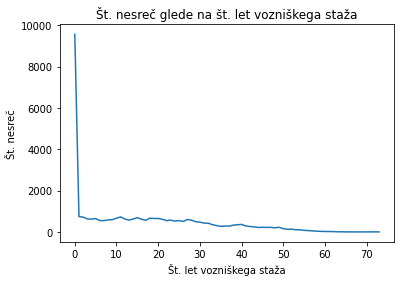

In [149]:
# Stevilo nesrec glede na vozniski staz
vozniskiStaz = np.array([int(value) for value in podatki[:,2]])
stazNesrece = collections.Counter(vozniskiStaz)

# opis podatkov - vidimo, da je povprečno št. vozniškega staža 15.7 let.
stats.describe(vozniskiStaz)

stazNesrece = collections.OrderedDict(sorted(stazNesrece.items()))

keys = list(stazNesrece.keys())
values = list(stazNesrece.values())

# Opaziva, da se nekako sorazmerno s št. let staža manjša tudi št. prometnih nesreč, 
# kar je nekako pričakovano, saj več izkušenj na cesti naj bi pomenilo manj napak.
plt.title('Št. nesreč glede na št. let vozniškega staža')
plt.ylabel('Št. nesreč')
plt.xlabel('Št. let vozniškega staža')
plt.plot(keys,values)